<a href="https://colab.research.google.com/github/ElenaGomezB/AA_PRACTICA1_GRUPO_10/blob/main/Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PRÁCTICA 2 - REDES CONVOLUCIONALES**
Grupo 10

Elena Gómez 

Ana Muñoz

# **Objetivo**

El  objetivo  de  esta  práctica  es  diseñar,  configurar  y  entrenar  un  modelo    Redes  de Neuronas Convolucionales. 

Crearemos un modelo  de Red  de  Neuronas  Convolucionales  que  sea  capaz  de  reconocer  y clasificar imágenes  de  ropa  en  sus  diferentes  tipologías.  Este  modelo  será  definido, 
configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.  

Usaremos el conjunto de datos Fashion-MNIST, precargado en Keras.
Fashion-MNIST  es  un  conjunto  de  datos  de  las  imágenes  de  los  artículos  de  Zalando. El conjunto de datos contiene 70K imágenes en escala de grises en 10 categorías.  Estas  imágenes  muestran  prendas  individuales  de  ropa  en  baja  resolución (28 x 28 píxeles)

Se usan 60K imágenes para entrenar la red y 10K imágenes para evaluar la precisión con la que la red aprende a clasificar las imágenes

- Importamos **tensorflow** y comprobamos que la versión es 2.0.0 o superior 

In [5]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)#

2.7.0


- **Datos Fashion-MNIST**

A continuación, cargamos las imágenes y creamos un vector de 10 elementos en el que a cada posición se le asigna el nombre de cada prenda. ('class_names')





In [6]:
# Importamos las imágenes
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Creamos vector con las prendas
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


4431872/4422102 [==============================] - 0s 0us/step


- **Creamos redes convolucionales**

**Caso 2**

In [7]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

model2 = Sequential()
model2.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.summary()
#Explicacion summary:
# [(7*7)+1]*64 = 3200 --> Obtenemos 64 matrices de 22*22
#7*7 --> Tamaño de la ventana + 1--> umbral
#Lo anterior * 64 filtros
#En el maxpooling obtenemos 64 matriz de 11*11, no sale ningun parámetro ya que 
#no devuelve nada, simplemente aplica operaciones y reduce su tamaño

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 64)       0         
 )                                                               
                                                                 
Total params: 3,200
Trainable params: 3,200
Non-trainable params: 0
_________________________________________________________________


In [8]:
#añadimos una segunda capa convolucional
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.summary()
#((3*3*64)+1)*128 --> matrices de 9*9
#3*3(tamaño ventana)*64(filtros anteriores)+1(umbral)*128(filtros nuevos)
#Con el Maxpooling obtenemos matrices de 4*4

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                             
                                                                 
Total params: 77,056
Trainable params: 77,056
Non-trainable params: 0
_________________________________________________________________


In [9]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model2.add(Flatten())
model2.add(Dense(65, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.summary()
#Flatten:
#Antes tenemos que ajustar los tensores a la entrada de la capa
#densa. Pasar de un tensor 3D a uno 1D (aplanar).
#Nuestra salida (4,4,128) se debe pasar a un vector de 
#(4x4x128=2048) antes de aplicar softmax)
#Primera capa densa:
#(65*2048)+65
#Segunda capa densa(softmax):
#(10*65)+10

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 65)                1

In [10]:
#Antes de compilar y entrenar los modelos, preparamos los datos
from keras.utils.np_utils import to_categorical
import tensorflow as tf

#fashion_mnist = tf.keras.datasets.fashion_mnist
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

#etiquetas
model2.add(Flatten(input_shape=(28,28)))

print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000,)


In [12]:
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model2.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)

test_loss, test_acc = model2.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/5
600/600 [==============================] - 8s 12ms/step - loss: 0.7442 - accuracy: 0.7271
Epoch 2/5
600/600 [==============================] - 7s 12ms/step - loss: 0.6397 - accuracy: 0.7634
Epoch 3/5
600/600 [==============================] - 7s 12ms/step - loss: 0.5853 - accuracy: 0.7846
Epoch 4/5
600/600 [==============================] - 7s 12ms/step - loss: 0.5452 - accuracy: 0.7994
Epoch 5/5
313/313 [==============================] - 2s 4ms/step - loss: 0.5271 - accuracy: 0.8075
Test accuracy: 0.8075000047683716


**Caso 3**

In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

model3 = Sequential()
model3.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1)))
model3.add(MaxPooling2D((2, 2)))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 22, 22, 64)        3200      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
Total params: 3,200
Trainable params: 3,200
Non-trainable params: 0
_________________________________________________________________


In [28]:
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 22, 22, 64)        3200      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                             
                                                                 
Total params: 77,056
Trainable params: 77,056
Non-trainable params: 0
_________________________________________________________________


In [29]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model3.add(Flatten())
model3.add(Dense(65, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 22, 22, 64)        3200      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 65)               

In [30]:
model3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model3.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)

test_loss, test_acc = model3.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/5
600/600 [==============================] - 7s 12ms/step - loss: 0.5593 - accuracy: 0.7998
Epoch 2/5
600/600 [==============================] - 7s 11ms/step - loss: 0.3655 - accuracy: 0.8687
Epoch 3/5
600/600 [==============================] - 7s 11ms/step - loss: 0.3188 - accuracy: 0.8838
Epoch 4/5
600/600 [==============================] - 6s 11ms/step - loss: 0.2925 - accuracy: 0.8944
Epoch 5/5
313/313 [==============================] - 2s 4ms/step - loss: 0.3370 - accuracy: 0.8775
Test accuracy: 0.8774999976158142


#**PREDICCIONES**

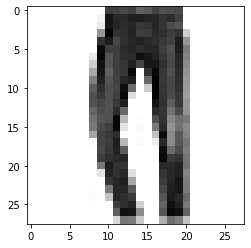

(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000,)
[9 2 1 ... 8 1 5]
1


In [32]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt

digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
print (train_images.shape)
print (train_labels.shape)

from keras.utils.np_utils import to_categorical

print(test_labels)
print(test_labels[5])





**modelo 2**

In [33]:

predictions = model2.predict(test_images)
print(np.argmax(predictions[5]))
print(predictions[5])
np.sum(predictions[5])
print(predictions)

1
[1.5478255e-04 9.9956864e-01 1.3059085e-05 9.6005488e-06 2.4032200e-04
 1.6051588e-07 1.3130769e-05 3.4395573e-09 3.4124395e-07 9.1050584e-10]
[[3.4799112e-05 3.9662868e-06 3.3784727e-05 ... 1.5685707e-01
  2.7815844e-03 8.0770284e-01]
 [2.4959801e-03 2.4472516e-07 9.6280843e-01 ... 7.8797907e-10
  3.5059307e-05 2.3045159e-09]
 [9.1144839e-06 9.9997842e-01 1.8081579e-07 ... 4.4258952e-10
  2.8970172e-08 1.6758032e-10]
 ...
 [1.6047664e-02 1.1431850e-05 5.2847579e-04 ... 3.8224931e-05
  9.4688046e-01 5.8496689e-06]
 [6.2396587e-04 9.5913708e-01 8.9184839e-05 ... 7.1402019e-06
  4.4058738e-06 9.0241847e-06]
 [8.3975756e-04 3.5990577e-04 1.1940280e-03 ... 1.3855678e-01
  2.8170342e-02 1.3747235e-02]]


**modelo 3**

In [34]:

predictions = model3.predict(test_images)
print(np.argmax(predictions[5]))
print(predictions[5])
np.sum(predictions[5])
print(predictions)

1
[2.1008326e-04 9.9963236e-01 5.8357514e-06 6.9066377e-06 4.3666617e-07
 1.2725671e-07 4.3625764e-06 3.2390951e-10 1.3976077e-04 8.1878220e-08]
[[1.18991842e-07 2.35348523e-07 1.76190831e-08 ... 9.89672029e-04
  1.00675325e-05 9.97823358e-01]
 [4.52959903e-05 5.65732634e-08 9.99866009e-01 ... 2.11651768e-12
  2.06298273e-06 1.34019359e-07]
 [6.62091043e-06 9.99977112e-01 4.52423663e-08 ... 8.68429113e-12
  5.42832822e-06 6.73954625e-09]
 ...
 [4.81485913e-05 6.67011335e-08 6.05566311e-05 ... 2.40420217e-09
  9.99777496e-01 4.89368830e-08]
 [2.27513240e-07 9.99993563e-01 2.49958759e-07 ... 1.14513643e-08
  1.19574068e-07 7.91923682e-08]
 [2.03829212e-03 2.36084132e-04 1.90885166e-05 ... 2.89689243e-01
  5.15738726e-02 1.04203774e-02]]
